# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [3]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [4]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

city                 date   fare        ride_id  \
0  Lake Jonathanshire  2019-01-14 10:14:22  13.83  5739410935873   
1  South Michelleport  2019-03-04 18:24:09  30.24  2343912425577   
2  Port Samanthamouth  2019-02-24 04:29:00  33.44  2005065760003   
3          Rodneyfort  2019-02-10 23:22:03  23.44  5149245426178   
4          South Jack  2019-03-06 04:28:35  34.58  3908451377344   

   driver_count   type  
0             5  Urban  
1            72  Urban  
2            57  Urban  
3            34  Urban  
4            46  Urban

## Deliverable 1: Get a Summary DataFrame 

In [17]:
#  1. Get the total rides for each city type
rides=pyber_data_df.groupby(["type"]).count()["ride_id"]

In [18]:
rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [19]:
# 2. Get the total drivers for each city type
drivers=pyber_data_df.groupby(["type"]).sum()["driver_count"]

In [28]:
#  3. Get the total amount of fares for each city type
c_fare=pyber_data_df.groupby(["type"]).sum()["fare"]

In [29]:
#  4. Get the average fare per ride for each city type. 
avg_fare=pyber_data_df.groupby(["type"]).mean()["fare"]

In [60]:
# 5. Get the average fare per driver for each city type. 
avg_drivers_pay=c_fare/drivers

In [71]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df=pd.DataFrame({"rides":rides,
                         "drivers":drivers,
                         "c_fare":c_fare,
                         "avg_fare":avg_fare,
                         "avg_driver_pay":avg_drivers_pay})

In [72]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [73]:
#  8. Format the columns.
pyber_summary_df["rides"]=pyber_summary_df["rides"].map("{:,}".format)
pyber_summary_df["drivers"]=pyber_summary_df["drivers"].map("{:,}".format)
pyber_summary_df["avg_fare"]=pyber_summary_df["avg_fare"].map("${:.2f}".format)
pyber_summary_df["avg_driver_pay"]=pyber_summary_df["avg_driver_pay"].map("${:.2f}".format)

In [74]:
pyber_summary_df

rides drivers    c_fare avg_fare avg_driver_pay
Rural       125     537   4327.93   $34.62          $8.06
Suburban    625   8,570  19356.33   $30.97          $2.26
Urban     1,625  59,602  39854.38   $24.53          $0.67

# Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [76]:
# 1. Read the merged DataFrame
pyber_data_df

city                 date   fare        ride_id  \
0     Lake Jonathanshire  2019-01-14 10:14:22  13.83  5739410935873   
1     South Michelleport  2019-03-04 18:24:09  30.24  2343912425577   
2     Port Samanthamouth  2019-02-24 04:29:00  33.44  2005065760003   
3             Rodneyfort  2019-02-10 23:22:03  23.44  5149245426178   
4             South Jack  2019-03-06 04:28:35  34.58  3908451377344   
...                  ...                  ...    ...            ...   
2370         Michaelberg  2019-04-29 17:04:39  13.38  8550365057598   
2371     Lake Latoyabury  2019-01-30 00:05:47  20.76  9018727594352   
2372         North Jaime  2019-02-10 21:03:50  11.11  2781339863778   
2373        West Heather  2019-05-07 19:22:15  44.94  4256853490277   
2374          Newtonview  2019-04-25 10:20:13  55.84  9990581345298   

      driver_count   type  
0                5  Urban  
1               72  Urban  
2               57  Urban  
3               34  Urban  
4               46  Urban  
...            ...    ...  
2370             6  Rural  
2371             2  Rural  
2372             1  Rural  
2373             4  Rural  
2374             1  Rural  

[2375 rows x 6 columns]

In [77]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
sum_fare=pyber_data_df.groupby(["type","date"]).sum()["fare"]

In [79]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
sum_fare=sum_fare.reset_index()

In [81]:
sum_fare.head()

type                 date   fare
0  Rural  2019-01-01 09:45:36  43.69
1  Rural  2019-01-02 11:18:32  52.12
2  Rural  2019-01-03 19:51:01  19.90
3  Rural  2019-01-04 03:31:26  24.88
4  Rural  2019-01-06 07:38:40  47.33

In [84]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
sum_pivot=sum_fare.pivot("date","type","fare")

In [91]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
daily_pivot_df=sum_pivot.loc['2019-01-01':'2019-04-29']


In [92]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
daily_pivot_df.index=pd.to_datetime(pivot_df.index)

In [93]:
# 7. Check that the datatype for the index is datetime using df.info()
daily_pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [132]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_pyber_resample=daily_pivot_df.resample('W').sum()

In [133]:
weekly_pyber_resample

type         Rural  Suburban    Urban
date                                 
2019-01-06  187.92    721.60  1661.68
2019-01-13   67.65   1105.13  2050.43
2019-01-20  306.00   1218.20  1939.02
2019-01-27  179.69   1203.28  2129.51
2019-02-03  333.08   1042.79  2086.94
2019-02-10  115.80    974.34  2162.64
2019-02-17   95.82   1045.50  2235.07
2019-02-24  419.06   1412.74  2466.29
2019-03-03  175.14    858.46  2218.20
2019-03-10  303.94    925.27  2470.93
2019-03-17  163.39    906.20  2044.42
2019-03-24  189.76   1122.20  2368.37
2019-03-31  199.42   1045.06  1942.77
2019-04-07  501.24   1010.73  2356.70
2019-04-14  269.79    784.82  2390.72
2019-04-21  214.14   1149.27  2303.80
2019-04-28  191.85   1357.75  2238.29

In [134]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')



Text(0, 0.5, 'Fare($USD)')

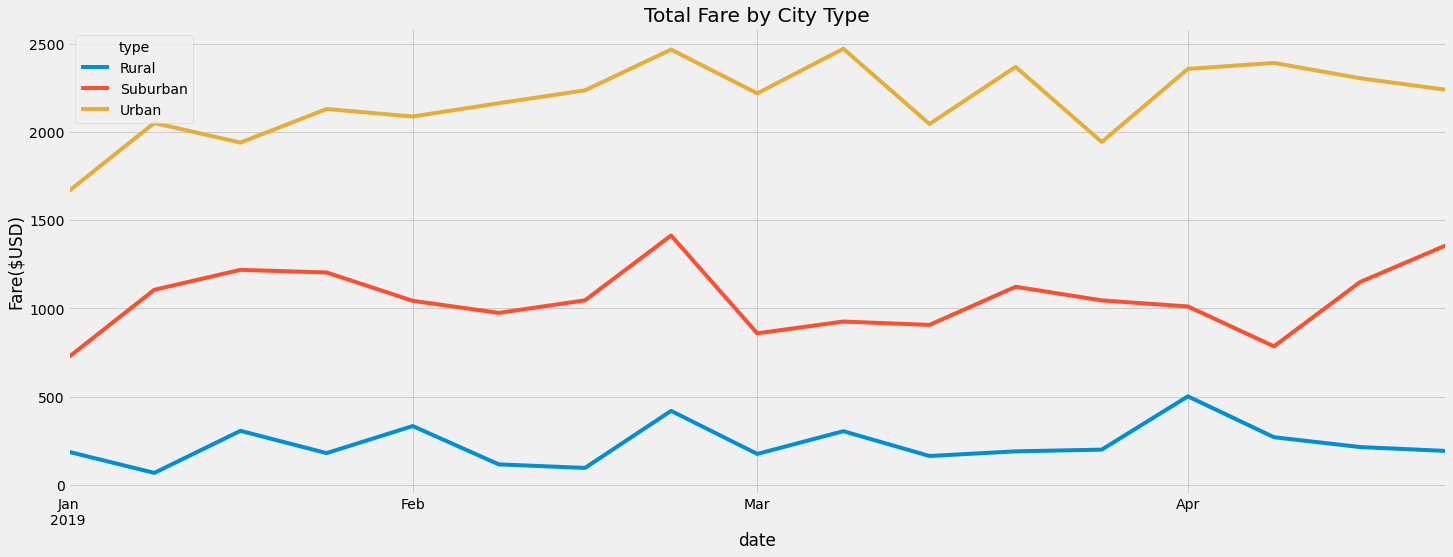

In [169]:
plt.rcParams["figure.figsize"] = (22,8)
weekly_plot=weekly_pyber_resample.plot()
weekly_plot.set_title("Total Fare by City Type")
weekly_plot.set_ylabel("Fare($USD)")

In [170]:
fig = weekly_plot.get_figure()
fig.savefig("Pyber_fare_summary.png")